<a href="https://colab.research.google.com/github/joaogariso/Data/blob/main/laboratory/L2_GCollab/Lab2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory Session 2 -- Assignment

To be delivered until 2022-12-16 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

Even if the actual relation between X and Y is linear, it is much more likely that **the cubic model would have a smaller RSS than the linear model**, as it would try to better fit the variability of the training data. It is possible, however unlikely, that the data would have a small enough variability that the linear model would better fit the training data, thus having a smaller RSS.


---
**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

On the contrary to the previous case, it is much more likely that **the linear model would have a smaller RSS than the cubic model**, as it has a better representation of the linear relation. Although unlikely, it is possible that the test data would have similar enough observations to the training data that the cubic model would have a smaller RSS than the linear model.

---
**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

It is more likely that **the cubic model would be a better fit to the training data**, as it has more flexibility, thus being more adaptable than its linear counterpart to different datasets. As such, the cubic model probably would have a smaller RSS.


---
**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

In this case, **it is unclear as to which model would have a smaller RSS**, as it depends on the proximity each has to the real relationship between X and Y. If the real model is close to being a linear one, then the linear model would probably have  a smaller RSS. But if that relationship is not close to linear, then the cubic model, with its greater flexibility, would have a smaller RSS.

---
**2.a)** Load the dataset "wine.csv". Do not change the dataset file.

In [12]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
 
url ='https://raw.githubusercontent.com/joaogariso/Data/main/Assignment%201/winequality.csv'
winequality_base = pd.read_csv(url)
winequality_base.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


---
**2.b)** Encode the feature "type".

In [13]:
winequality = winequality_base.copy()
 
winequality['type'] = (winequality['type'] == 'red') + 0
 
winequality.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5


---
**2.c)** Perform a simple linear regression considering *quality* as the response and *pH* as the predictor. Given the results, comment on the following statements:

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
 
## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
## array in a matricial shape, even if with a single column
X = winequality['pH'].values.reshape(-1,1)
y = winequality['quality'].values.reshape(-1, 1)
 
## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)
 
## Print the interception and coefficient
print('quality = {:.4f} + {:.4f} * pH'.format(regr.intercept_[0], regr.coef_[0][0]))
 


quality = 5.4774 + 0.1059 * pH


---
    i) Are the predictor and response statistically related?

In [15]:
from scipy.stats import pearsonr

## Calcula a correlação
winequality_corrs = winequality.corr()

## Obtém o p-value
pvals = winequality.corr(method=lambda x, y: pearsonr(x,y)[1])
pvals_qp = pvals['quality']['pH']
print('p-value: {:.6f}'.format(pvals_qp))

p-value: 0.115931


In order to be statistically related, the p-value shown be **equal or lower than 0.05**. Being that is is equal to *0.115931*, we can conclude that the predictor and resposnse **are not** statistically related.




---
    ii) How strong is the relationship between predictor and response? (*Hint: comment on the R^2 score of the model*)

In [16]:
## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
quality_pred = regr.predict(X)
r2_value = r2_score(y, quality_pred)
print('R^2: {:.4f}'.format(r2_value))

R^2: 0.0004


There is almost no relationship to be considered between the predictor and the response, because the R^2 score is close to zero (*0.0004*).

---
    iii) Is the relationship between the predictor and response positive or negative?

The relationship is positive because the slope of the linear regression is positive (*0.1059*).

---
    iv) What is the predicted value of quality when the pH is 9?

In [17]:
#Using the calculated linear regression
pH=9
quality = regr.intercept_[0] + regr.coef_[0][0] * pH
print('The predicted value for the quality when the pH is 9 is {:.4f}'.format( quality))


The predicted value for the quality when the pH is 9 is 6.4309


---
**2.d)** Plot a scatter plot of the response and predictor, along with the regression line.

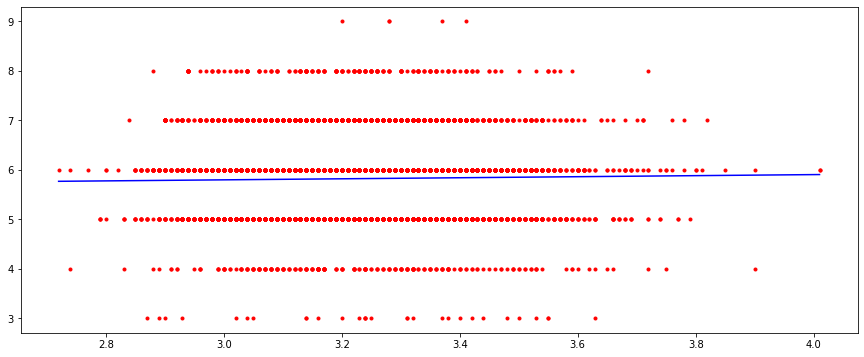

In [18]:
## Definir os limites de pH e os valores correspondentes de qualidade
limits_pH = np.array([min(X), max(X)])
quality_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_pH
 
## Plot the scatterplot and the regression line
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(winequality['pH'], winequality['quality'], '.r')
plt.plot(limits_pH, quality_vals, 'b-')
plt.show()


---
## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

The **training error is equal to 0** when using the **KNN method** (with K=1) because the training values themselves are used to calculate the error. So an averaged error of 18% means a **36% error** in the test dataset, making it worse that 30%.\
Therefore **we can consider that performing a logistic regression is better**, in terms of classifying new observations

---
**4.a)** Create a new column, "quality7", that contains a 1 if quality contains a value equal or above 7, and a 0 if quality contains a value below 7. Drop the original column "quality".

In [19]:
winequality7 = winequality.drop(columns=['quality'])
winequality7['quality7'] = (winequality['quality'] >= 7) + 0
 
winequality7.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality7
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0




---


**4.b)** Do a correlation matrix plot between all the columns to evaluate which features are linearly correlated. Consider a statistical significance of 0.1%. Describe your findings, with a focus on evaluating which features are most related with "quality7". 




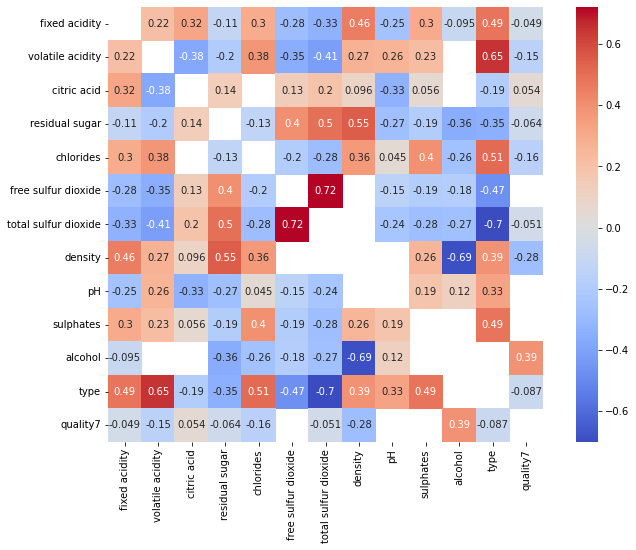

In [20]:
from scipy.stats import pearsonr
 
## Calcular as correlações
winequality7_corrs = winequality7.corr()
 
## Calcular o p-value
pvals = winequality7.corr(method=lambda x, y:pearsonr(x,y)[1])
 
## Cria a mask a ser aplicada posteriormente
ptg = 0.1/100
mask = pvals > ptg
 
## Plot aos gráficos
plt.subplots(figsize=(12,8))
sns.heatmap(winequality7_corrs, mask=mask, square=True, annot= True, cmap='coolwarm')
plt.show()


The correlation matrix presents some strong correlations between: '**total sulfur dioxide**' & '**free sulfur dioxide**', and '**type**' & '**volatile acidity**'. There are also strong negative correlations between: '**total sulfur dioxide**' & '**type**', and '**density**' & '**alcohol**'. 

'**quality7**'shows little correlation with other variables, being the most noticeble with '**alcohol**'. This indicates that a wine with a higher alcohol content is more likely to have a quality level of seven or higher.

---

**4.c)** Create the inputs as all the predictors and outputs as the "quality7" feature. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [21]:
from sklearn import model_selection
from random import sample
import random
 
## Estabelece os indices dos datasets de teste e treino
test_size = 0.3      # Ratio of test dataset
seed = 100           # Random seed
random.seed(seed)    # Apply random seed
idxs_test = sample(range(winequality7.shape[0]), int(test_size * winequality7.shape[0]))  # Sample idxs for test datasets
idxs_train = [i for i in range(winequality7.shape[0]) if i not in idxs_test] # Obtain the remaining idxs as training
 
## Designa os predictos e outputs
X_winequality7 = winequality7.drop(columns=['quality7'])
X = X_winequality7.values
y = winequality7['quality7'].values
 
## Divide os vetores de input e output
X_train = X[idxs_train,:]
X_test = X[idxs_test,:]
 
y_train = y[idxs_train]
y_test = y[idxs_test]


---
**4.d)** Perform LDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [22]:
## lINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
 
## Criar o modelo
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
 
## Prevê os próximos resultados
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
 
print ('\n' + 'Actual'.rjust(25))
print ('{} |  {}'.format('<7'.rjust(20),'>=7'))
print ('{}:  {}  |  {}'.format('Predicted <7'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}  |  {}'.format('Predicted >=7'.rjust(14), cm[0,1], cm[1,1]))
print('\nModel Error: {:.2f}%'.format(100-accuracy_score(y_pred, y_test)*100))
 
## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_LDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 1).copy()



                   Actual
                  <7 |  >=7
  Predicted <7:  1484  |  259
 Predicted >=7:  96  |  110

Model Error: 18.21%


---
**4.e)** Perform QDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [23]:
## QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
## Criar o modelo
model = QuadraticDiscriminantAnalysis()
model.fit(X_train,y_train)
 
## Prevê os próximos resultados
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
 
print ('\n' + 'Actual'.rjust(25))
print ('{} |  {}'.format('<7'.rjust(20),'>=7'))
print ('{}:  {}  |  {}'.format('Predicted <7'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}  |  {}'.format('Predicted >=7'.rjust(14), cm[0,1], cm[1,1]))
print('\nModel Error: {:.2f}%'.format(100-accuracy_score(y_pred, y_test)*100))
 
## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_QDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()



                   Actual
                  <7 |  >=7
  Predicted <7:  1161  |  106
 Predicted >=7:  419  |  263

Model Error: 26.94%


---
**4.f)** Perform logistic regression on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [24]:
##  LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
 
 
## Criar o modelo
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)
 
## Prevê os próximos resultados
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
 
print ('\n' + 'Actual'.rjust(25))
print ('{} |  {}'.format('<7'.rjust(20),'>=7'))
print ('{}:  {}  |  {}'.format('Predicted <7'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}  |  {}'.format('Predicted >=7'.rjust(14), cm[0,1], cm[1,1]))
print('\nMode Error: {:.2f}%'.format(100-accuracy_score(y_pred, y_test)*100))
 
## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_logistic_pred = model.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 1).copy()



                   Actual
                  <7 |  >=7
  Predicted <7:  1518  |  289
 Predicted >=7:  62  |  80

Mode Error: 18.01%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
**4.g)** Perform naive Bayes on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [25]:
## NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
 
## Criar o modelo
model = GaussianNB()
model.fit(X_train, y_train)
 
## Prevê os próximos resultados
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
 
print ('\n' + 'Actual'.rjust(25))
print ('{} |  {}'.format('<7'.rjust(20),'>=7'))
print ('{}:  {}  |  {}'.format('Predicted <7'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}  |  {}'.format('Predicted >=7'.rjust(14), cm[0,1], cm[1,1]))
print('\nModel Error: {:.2f}%'.format(100-accuracy_score(y_pred, y_test)*100))
 
## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_GNB_pred = model.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 1).copy()


                   Actual
                  <7 |  >=7
  Predicted <7:  1152  |  136
 Predicted >=7:  428  |  233

Model Error: 28.94%


---
**4.h)** Perform KNN on the training data, with several values of K, in order to predict "quality7" using the remaining variables. What test errors are obtained? Which value of K seems to perform the best on this data set?

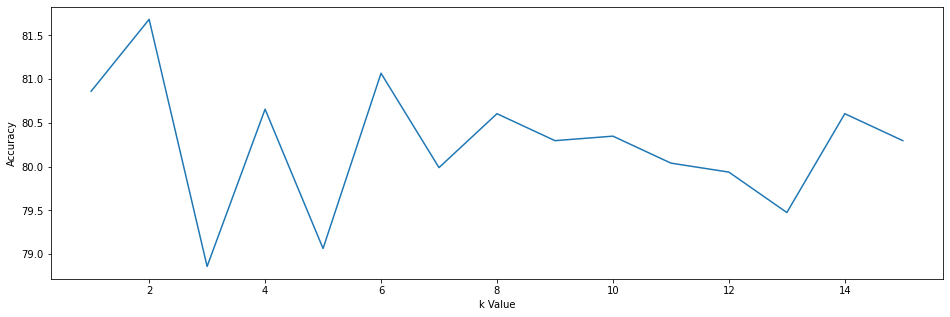


                   Actual
                  <7 |  >=7
  Predicted <7:  1486  |  263
 Predicted >=7:  94  |  106

Model Error: 18.32%


In [26]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
 
 
def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):
    
    ## Create the model and fit the data to it
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
 
    ## Predict the classification and print the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100
    
    if verbosity == 1:
        print ('\n' + 'Actual'.rjust(25))
        print ('{} |  {}'.format('<7'.rjust(20),'>=7'))
        print ('{}:  {}  |  {}'.format('Predicted <7'.rjust(14), cm[0,0], cm[1,0]))
        print ('{}:  {}  |  {}'.format('Predicted >=7'.rjust(14), cm[0,1], cm[1,1]))
        print('\nModel Error: {:.2f}%'.format(100-accuracy_val))
    
    return model, accuracy_val
 
 
 
## Initialize a list to store the accuracies
accuracies = []
knn_limit = 15
 
## Access the custom created KNN function to calculate the accuracy for each number of neighbors
for i in range(knn_limit):
    _, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i+1, verbosity=0)
    accuracies.append(accuracy_val)
 
## Plot the results
plt.subplots(figsize=(16, 5))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()
 
 
## Guarda Informação Importante
model, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=2, verbosity=1)
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_KNN_pred = model.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 1).copy()

---
**4.i)** Calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
## Calcula as curvas
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_GNB_true, y_GNB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)
 
 
 
## Mostra os resultados da AUC
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_QDA_true, y_QDA_pred)))
print('{}: {:.5f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_GNB_true, y_GNB_pred)))
print('{}: {:.3f}'.format('KNN'.rjust(19), roc_auc_score(y_KNN_true, y_KNN_pred)))


                      AUC
                LDA: 0.806
                QDA: 0.807
Logistic Regression: 0.80509
        Naive Bayes: 0.736
                KNN: 0.727


---
**4.j)** Plot the ROC curves for the 5 methods. Compare the results.

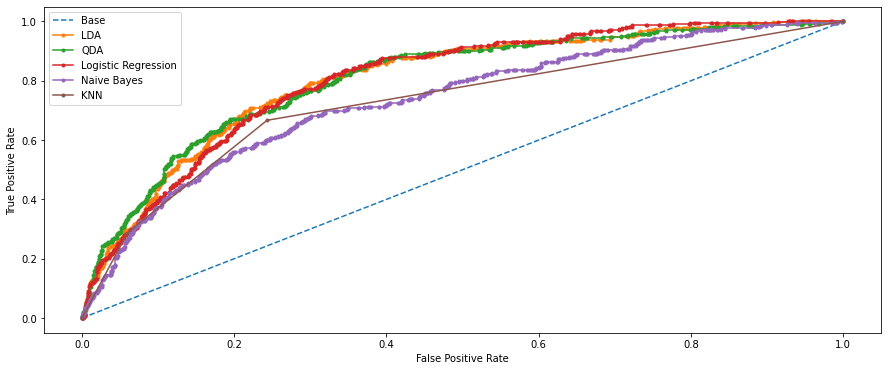

In [28]:
# Plot the ROC curve for the model
plt.subplots(figsize=(15, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

---
## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how the leave-one-out cross validation (LOOCV) is implemented.

In the LOOCV method, each observation is considered as the validation set and the remaining (N-1) observations are considered as the training set.

For this, we split the dataset into the corresponding sets using all but one observation as part of the training set. Next, we construct the model using only data from this last set.

With the model, we predict the response value of the one observation of the validation set and calculate its mean squared error (MSE) in the case of quantitative responses and misclassification rate in case of a qualitative (discrete) response.

Lastly, repeat the process N times and then calculate the test error to be the average of all N errors.


---
**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV)

K-fold cross-validation is a method for evaluating the performance of a machine learning model. It involves randomly dividing the dataset into k subsets, training the model on k-1 subsets, and evaluating it on the remaining subset. This process is repeated k times with a different subset being used as the test set in each iteration. The final evaluation metric is the average of the performance on all k iterations.

One advantage of k-fold cross-validation is that it provides a more reliable estimate of the model's performance than a single validation set, because it uses all of the data for training and testing. This is particularly useful if the dataset is small, because it allows the model to be trained and tested on more data, which can give a more accurate estimate of its performance.

Another advantage of k-fold cross-validation is that it can help to reduce the variance of the evaluation metric, because it averages the performance over multiple iterations. This can be particularly useful if the model has high variance, which means that its performance can vary significantly depending on the specific data it is trained and tested on.

However, one disadvantage of k-fold cross-validation is that it can be computationally expensive, especially if the model is complex and takes a long time to train. Additionally, it can be time-consuming to prepare the data for k-fold cross-validation, especially if the data needs to be shuffled or stratified.

In contrast, the validation set approach involves splitting the data into a training set and a validation set, training the model on the training set, and evaluating it on the validation set. This method is simpler and faster than k-fold cross-validation, but it has some limitations.

One disadvantage of the validation set approach is that it can be less reliable than k-fold cross-validation, because it only uses a single split of the data for training and testing. This means that the model's performance may be highly dependent on the specific data that was used for the training and validation sets, and the results may not be representative of the model's true performance. Additionally, if the validation set is small, the evaluation metric may have high variance, which can make it difficult to accurately assess the model's performance.

One advantage of LOOCV is that it can provide a more accurate estimate of the model's performance than k-fold cross-validation with a larger value of k, because it uses all of the data for training and testing. This is particularly useful if the dataset is small and there are not enough observations to create a large number of folds. Moreover, k-fold cross-validation estimates of prediction error will typically be biased upwards, whereas this bias is minimized using the LOOCV, even though this estimate presents a higher variance when comparing the results of each iteration.

One other disadvantage of LOOCV is that it can be computationally expensive, because it requires training and evaluating the model n times. Additionally, it can be time-consuming to prepare the data for LOOCV.


---
## Section 4 -- Other Questions

**6)** In your group's opinion, what are the advantages and disadvantages of using a virtual environment when programming in Python?

Python virtual environments are used to optimize the time it takes to process your code by creating subdirectories (the so-called environments) in which you store packages needed for specific projects. When you wish to work on a project that only requires some packages, this will allow your device to only search in that directory and not get flooded. Also, some packages cause collisions and having different directories will also avoid that. In addition, it helps organization-wise.

There are **no direct disadvantages in using a virtual environment**, the only situation where it may not be considered necessary or useful is when you have a basic program that doesn't required packages other than the pre-installed module called Python Standard Library.

---
**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

It's better to use **Jupyter Notebooks** when:
*   You need to have two people working at the same time (Colab will have trouble saving the files and will overwrite changes in different files by keeping the more recent one)
*   You don't have an internet connection
*   Your workspace requires a lot of input files (Colab requires you to upload them each time)
*   You need to work for more than 12 hours (Colab shuts down after that time) or need to leave your device idle (Colab shut down quickly in that situation)

It's better to use **Google Colab** when:
*   Your device doesn't have strong processing capabilities (it's cloud-based and only needs text input and an internet connection) or system memory (Jupyter will probably not last for long sessions if this applies)
*   You want to leave comments on specific cells for your project mates
*   You need specific graphic libraries and want them pre-installed
*   You don't have storage in your computer for the notebooks (again, it's cloud based)
*   You want to work on different devices for the same project






---
**8)** Enter your GitHub repository webpage.

https://github.com/PeterNoites/AA_project_G9